## Dataset initialization 

In [72]:
# import required libraries
import pandas as pd

In [73]:
#import data sets about genomic data
df0=pd.read_csv('KIRC_HiSeqV2.data',sep='\t').set_index('sample').T
df1=pd.read_csv('KIRP_HiSeqV2.data',sep='\t').set_index('sample').T
df2=pd.read_csv('KICH_HiSeqV2.data',sep='\t').set_index('sample').T

In [74]:
df0.shape, df1.shape, df2.shape

((606, 20531), (323, 20531), (91, 20531))

In [75]:
# concat datasets related to 3 subtypes
df=pd.concat([df0, df1, df2])

In [76]:
df.shape

(1020, 20531)

## Preprocessing stage

In [77]:
# drop duplicate rows
df=df.drop_duplicates()

In [78]:
# initial shape of cancated dataset
df.shape

(1020, 20531)

- No duplicates

In [79]:
df.isnull().sum()

sample
ARHGEF10L    0
HIF3A        0
RNF17        0
RNF10        0
RNF11        0
            ..
BCL6B        0
GSTK1        0
SELP         0
SELS         0
Subtype      0
Length: 20531, dtype: int64

In [80]:
# Count the null values containing features
n=(df.isnull().sum()>0).sum()
n

0

- No null values

In [81]:
# temp set for store features which have more than 20 zero values
tset=set()

In [82]:
print('Count of zeros')
for column_name in df.columns:
    column = df[column_name]
    # Get the count of Zeros in column 
    count = (column == 0).sum()
    if(count>20 and column_name!='Subtype'):
#         print('\t', column_name, ' : ', count)
        tset.add(column_name)
        

Count of zeros


In [83]:
len(tset)

5927

In [84]:
df=df.drop(tset,axis=1)

In [85]:
df.shape

(1020, 14604)

In [87]:
for column_name in df.columns:
    column = df[column_name]
    
    if(count>0 and column_name!='Subtype'):
        df[column_name] = df[column_name].replace(0, df[column_name].mean())

In [1]:
# # import required libraries
# import pandas as pd

# df=pd.read_csv('zeroFeatureReoved.csv')

In [88]:
df.describe()

sample,ARHGEF10L,HIF3A,RNF10,RNF11,RNF13,GTF2IP1,REM1,RTN4RL2,C16orf13,FGFR1OP2,...,PLEKHG5,METTL11A,GNGT2,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Subtype
count,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,...,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000,1020.000000
mean,10.406845,5.641882,11.852381,11.241800,10.940433,12.595824,4.494032,5.062379,9.818718,9.070804,...,7.847189,8.497319,5.109235,9.646504,12.597406,8.340407,12.006599,6.840705,9.842902,0.495098
std,0.717188,1.855054,0.418900,0.534098,0.457514,0.565334,1.539517,1.545036,0.953121,0.477915,...,1.081518,0.643082,1.123299,0.690322,1.024740,2.032780,0.743402,1.760950,0.407978,0.654849
min,5.735500,0.535000,10.541800,8.096000,8.574400,10.841200,0.490800,0.877000,4.854300,6.346000,...,3.178900,4.146200,0.514800,6.034700,8.727800,3.306600,8.967400,0.459700,8.516700,0.000000
25%,10.007925,4.349125,11.546775,10.944150,10.685450,12.198175,3.344925,4.027650,9.165875,8.835075,...,7.273325,8.090550,4.467000,9.357050,12.130525,6.789200,11.461900,5.655575,9.575125,0.000000
50%,10.478600,5.780700,11.802500,11.320950,10.954350,12.517700,4.622500,5.125100,9.780550,9.131900,...,7.967800,8.439050,5.289200,9.754650,12.807700,8.836400,11.929050,7.085700,9.806450,0.000000
75%,10.872800,6.947000,12.129400,11.593450,11.213200,12.923225,5.598825,5.969575,10.386000,9.381650,...,8.541600,8.793725,5.910250,10.064950,13.287400,9.923750,12.511825,8.190575,10.075325,1.000000
max,13.227300,11.539700,13.327500,13.512500,13.920400,14.704200,9.098100,10.471400,13.503700,10.536100,...,11.538800,11.970900,8.772000,11.555900,16.182000,12.336000,14.845300,10.376200,12.222000,2.000000


In [89]:
df.shape

(1020, 14604)

In [90]:
# use Pearson correlation to find the correlation between variables
cor = df.corr(method='pearson')
cor

sample,ARHGEF10L,HIF3A,RNF10,RNF11,RNF13,GTF2IP1,REM1,RTN4RL2,C16orf13,FGFR1OP2,...,PLEKHG5,METTL11A,GNGT2,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Subtype
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,1.000000,-0.044445,0.179145,-0.249363,-0.221152,0.284912,-0.165209,-0.183334,0.093211,-0.257420,...,0.165054,0.068032,-0.201306,0.084035,-0.158253,-0.314865,0.261985,-0.149132,-0.157872,0.286024
HIF3A,-0.044445,1.000000,-0.124881,0.158574,-0.137652,-0.182319,0.439664,0.200263,0.029148,0.231746,...,0.408364,-0.297022,0.290151,0.183253,0.314144,0.494194,-0.374078,0.391042,-0.166654,-0.364318
RNF10,0.179145,-0.124881,1.000000,0.069303,-0.127804,-0.014772,-0.168285,0.074468,-0.152643,0.035507,...,-0.296245,0.474871,-0.249598,-0.348610,-0.398006,-0.173006,0.242310,-0.018560,0.205845,0.442828
RNF11,-0.249363,0.158574,0.069303,1.000000,0.402193,-0.258238,0.180592,0.147279,-0.505219,0.539867,...,-0.109895,-0.074321,-0.016732,-0.266333,-0.115785,0.398233,-0.382609,0.401362,0.047133,-0.155069
RNF13,-0.221152,-0.137652,-0.127804,0.402193,1.000000,-0.055859,-0.157791,-0.018438,-0.289225,0.388251,...,-0.359854,-0.050206,-0.073661,-0.163412,-0.229333,0.003877,0.006808,0.024552,0.140533,-0.044802
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
BCL6B,-0.314865,0.494194,-0.173006,0.398233,0.003877,-0.536885,0.723028,0.398131,-0.013401,0.433930,...,0.429432,-0.307203,0.569647,0.001985,0.431921,1.000000,-0.557993,0.611653,-0.068570,-0.550064
GSTK1,0.261985,-0.374078,0.242310,-0.382609,0.006808,0.375453,-0.404440,-0.270159,0.392699,-0.422509,...,-0.379395,0.404323,-0.268244,-0.215159,-0.281217,-0.557993,1.000000,-0.412254,0.303472,0.450171
SELP,-0.149132,0.391042,-0.018560,0.401362,0.024552,-0.281338,0.558138,0.200524,-0.176959,0.295047,...,0.289129,-0.199583,0.488025,-0.055974,0.319104,0.611653,-0.412254,1.000000,-0.154871,-0.366812


In [91]:
c1 = cor.stack().sort_values(ascending=False).drop_duplicates()
high_cor = c1[c1.values!=1]    
high_cor[high_cor>0.8]

sample    sample  
C1QC      C1QB        0.989658
TMEM176B  TMEM176A    0.985748
C1QB      C1QA        0.985031
CD3E      CD2         0.977448
CDH5      CD34        0.976007
                        ...   
CD6       PLCB2       0.800005
CDK5RAP3  C6orf26     0.800005
MS4A6A    TREM2       0.800004
LCK       IL2RB       0.800002
COX8A     SNRNP25     0.800002
Length: 45906, dtype: float64

In [92]:
# MultiIndex into temp file
temp= high_cor[high_cor>0.8].index

In [93]:
# temp set for store features which are high correlated
tset=set()

In [94]:
for i in range(temp.size):
    tset.add(temp[i][0])

In [95]:
len(tset)

2804

In [96]:
tset

{'AMICA1',
 'HOXB6',
 'FLJ45340',
 'ADCY4',
 'EDNRA',
 'FOXO3',
 'HEY1',
 'C7orf43',
 'EOMES',
 'GLTSCR2',
 'CCDC78',
 'PTPRG',
 'SLC25A10',
 'USP12',
 'SH2D1A',
 'GOT1',
 'MDN1',
 'BATF',
 'ARRDC1',
 'MMGT1',
 'RDX',
 'CYSLTR1',
 'C1QA',
 'FAM10A4',
 'PPIL2',
 'FLI1',
 'RNASE2',
 'MTF1',
 'TTC33',
 'CENPF',
 'LOC150776',
 'ATP6V1B1',
 'RASIP1',
 'C17orf79',
 'PIK3CG',
 'WSB1',
 'KPNA5',
 'MED11',
 'ESCO2',
 'JMJD1C',
 'ZNF704',
 'POLRMT',
 'SS18L2',
 'HBB',
 'NAF1',
 'MYBL2',
 'PIK3C2A',
 'SERBP1',
 'PIK3CA',
 'SYNPO',
 'KCNMB1',
 'RPS3',
 'EPN1',
 'C10orf10',
 'RPS15',
 'CYC1',
 'PTGDR',
 'PSMB4',
 'PRELID1',
 'SMEK2',
 'LASS6',
 'ELMO1',
 'XPO4',
 'SH3GLB1',
 'RRP9',
 'AES',
 'PSMB3',
 'EGFL7',
 'TMUB1',
 'COX5B',
 'MPV17L2',
 'ZDHHC21',
 'TMEM27',
 'OTUB1',
 'PGF',
 'TMSB10',
 'KIF20B',
 'HCK',
 'TP53I13',
 'ADRA2B',
 'UHMK1',
 'IL12RB1',
 'CCNL2',
 'CLEC1A',
 'RSL24D1',
 'RFTN1',
 'NPTX2',
 'EIF5AL1',
 'SLC28A1',
 'SPN',
 'GGT5',
 'MST1P9',
 'HCCS',
 'HLA-B',
 'TEX264',
 'MAPK8IP3

In [97]:
# drop high correlated features  
df= df.drop(tset,axis=1)

In [98]:
df.shape

(1020, 11800)

In [99]:
whole_df=df

In [100]:
cor = df.corr(method='pearson')

In [126]:
# correlation of variables with the target variable
cor_target = abs(cor["Subtype"])
cor_target

sample
ARHGEF10L    0.286024
HIF3A        0.364318
RNF10        0.442828
RNF11        0.155069
RNF13        0.044802
               ...   
METTL11A     0.517814
TULP3        0.383500
SELP         0.366812
SELS         0.253846
Subtype      1.000000
Name: Subtype, Length: 11800, dtype: float64

In [359]:
# first 300 features with high correlation
high_cor_300=cor_target.iloc[cor_target.argsort()[-301:]]
high_cor_300

sample
P4HA2      0.558442
LAYN       0.558456
DIRAS1     0.558460
PAM        0.558639
PNRC1      0.558685
             ...   
PAK4       0.675372
CYP2J2     0.683767
CP         0.694543
BNIP3L     0.699032
Subtype    1.000000
Name: Subtype, Length: 301, dtype: float64

In [360]:
# select 300 features
selected_300_x = df[high_cor_300.index]
selected_300_x.shape

(1020, 301)

In [361]:
selected_300_x.index=df.index

In [363]:
# # store best 300 features in a seperate file
# selected_300_x.to_csv("./HiSeq_selected_300.csv", encoding='utf-8', index=True)

In [368]:
# import required libraries
import pandas as pd

df=pd.read_csv('HiSeq_selected_300.csv')

In [369]:
# df=whole_df

In [370]:
df.shape

(1020, 302)

In [371]:
df=df.set_index('Unnamed: 0')

In [373]:
df

,P4HA2,LAYN,DIRAS1,PAM,PNRC1,BAIAP2L1,C9orf89,IFI44,HMGA1,SAMD12,...,MSN,MXI1,PYGB,CDK19,TLR3,PAK4,CYP2J2,CP,BNIP3L,Subtype
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
TCGA-BP-4162-01,11.4785,7.7430,1.8806,13.3153,11.6967,6.2328,7.3978,9.1425,7.7919,6.6409,...,14.0251,10.9306,10.8972,10.6103,11.4866,9.5058,12.685500,9.9631,12.6306,0.0
TCGA-CJ-5677-11,10.2855,6.0072,7.7431,12.2068,10.8914,8.6301,7.4951,7.4357,9.6495,9.5436,...,13.7918,10.0293,11.5001,9.3821,8.8116,10.5192,6.601000,7.8735,11.4449,0.0
TCGA-DV-5566-01,10.5787,7.3012,2.4839,12.3738,11.9386,7.8784,8.4602,8.7509,8.4788,7.0012,...,14.1990,10.3841,11.5909,9.6508,10.9106,10.2908,10.918200,11.6266,12.6756,0.0
TCGA-BP-5191-01,12.0561,8.4121,3.1644,13.5392,11.9505,7.6605,8.7078,9.5490,8.9055,8.9297,...,14.0064,10.8784,11.2642,9.0538,9.9953,10.5198,13.394500,14.6721,13.5792,0.0
TCGA-BP-5200-01,11.1080,8.7075,2.8376,12.4071,11.9871,5.7673,7.8019,8.3240,8.7962,5.3036,...,14.4586,10.4881,11.0421,10.2477,11.4003,9.8556,11.688700,10.0496,11.8021,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TCGA-KO-8408-01,10.0683,5.3598,10.9761,11.9206,9.8070,12.2957,9.3979,6.7018,9.6166,9.9115,...,12.1722,9.6652,13.8269,7.4655,4.7064,12.1872,2.398800,3.8648,10.5100,2.0
TCGA-KM-8443-01,9.1959,4.6477,10.1496,8.1433,10.5821,11.1547,9.0690,5.0054,9.9427,10.3514,...,11.9313,8.8256,13.5962,7.4527,6.4063,12.5805,7.813736,0.9009,8.5598,2.0
TCGA-KM-8442-01,8.7076,5.8321,9.2769,9.5504,10.8684,11.0731,9.3718,6.5861,10.2551,10.0622,...,12.0316,9.5216,13.1908,7.5970,7.6038,11.9058,1.008300,1.6481,10.1306,2.0


In [374]:
#first 20 features with high correlation
high_cor_20=cor_target.iloc[cor_target.argsort()[-21:-1]]

# select 20 features
selected_20_x = df[high_cor_20.index]
selected_20_x.shape

(1020, 20)

In [375]:
#first 50 features with high correlation
high_cor_50=cor_target.iloc[cor_target.argsort()[-51:-1]]

# select 50 features
selected_50_x = df[high_cor_50.index]
selected_50_x.shape

(1020, 50)

In [376]:
#first 100 features with high correlation
high_cor_100=cor_target.iloc[cor_target.argsort()[-101:-1]]

# select 100 features
selected_100_x = df[high_cor_100.index]
selected_100_x.shape

(1020, 100)

## Dataset balancing 

In [377]:
df['Subtype'].value_counts()

0.0    606
1.0    323
2.0     91
Name: Subtype, dtype: int64

- Dataset unbalanced

### Oversampling & Undersampling 

In [378]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

req_f=130

# Resampling the minority class. The strategy can be changed as required.
ros = RandomOverSampler(sampling_strategy={2: req_f}, random_state=42)

# Resampling the majority classes. The strategy can be changed as required.
rus = RandomUnderSampler(sampling_strategy={0: req_f,1:req_f}, random_state=42)

In [379]:
Y=df['Subtype']

In [380]:
x=df.drop(['Subtype'], axis=1)

In [381]:
# x.shape

In [382]:
# Fit the model to generate the data with all features dataset
oversampled_X, oversampled_Y = ros.fit_resample(x, Y)
sampled_X, sampled_Y = rus.fit_resample(oversampled_X, oversampled_Y)

In [383]:
# Fit the model to generate the data with 100 features dataset
oversampled_X_100, oversampled_Y = ros.fit_resample(selected_100_x, Y)
sampled_X_100, sampled_Y = rus.fit_resample(oversampled_X_100, oversampled_Y)

In [384]:
# Fit the model to generate the data with 50 features dataset
oversampled_X_50, oversampled_Y = ros.fit_resample(selected_50_x, Y)
sampled_X_50, sampled_Y = rus.fit_resample(oversampled_X_50, oversampled_Y)

In [385]:
# Fit the model to generate the data with 20 features dataset
oversampled_X_20, oversampled_Y = ros.fit_resample(selected_20_x, Y)
sampled_X_20, sampled_Y = rus.fit_resample(oversampled_X_20, oversampled_Y)

In [386]:
sampled_Y.value_counts()

0.0    130
2.0    130
1.0    130
Name: Subtype, dtype: int64

## Test the models 

In [387]:
from sklearn import svm
from sklearn.model_selection import cross_val_score

#### Check the kernels in SVM 

In [471]:
# for 300 features
acc = cross_val_score(svm.SVC(random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with rbf kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with rbf kernel: 0.87 (+/- 0.07)


In [472]:
acc = cross_val_score(svm.SVC(kernel='poly',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with linear kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with linear kernel: 0.93 (+/- 0.05)


In [473]:
acc = cross_val_score(svm.SVC(kernel='linear',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with linear kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with linear kernel: 0.93 (+/- 0.06)


In [474]:
acc = cross_val_score(svm.SVC(kernel='sigmoid',random_state=0), sampled_X, sampled_Y, cv=5)
print("Accuracy SVM with sigmoid kernel: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with sigmoid kernel: 0.55 (+/- 0.08)


* poly performed well

#### Check the feature scaling method to SVM

In [475]:
svc=svm.SVC(kernel='poly', random_state=0)

In [476]:
acc = cross_val_score(svc, sampled_X, sampled_Y, cv=5)
print("Accuracy SVM without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM without transformation: 0.93 (+/- 0.05)


In [477]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [478]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Standardization: 0.82 (+/- 0.11)


In [479]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', svc)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy SVM with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM with Normalizaton: 0.93 (+/- 0.06)


- Without transformation performs well

#### Evaluation Without Feaure scaling

In [480]:
acc = cross_val_score(svc, sampled_X_20, sampled_Y, cv=5)
print("Accuracy SVM using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 20 features: 0.86 (+/- 0.05)


In [481]:
acc = cross_val_score(svc, sampled_X_50, sampled_Y, cv=5)
print("Accuracy SVM using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 50 features: 0.88 (+/- 0.03)


In [482]:
acc = cross_val_score(svc, sampled_X_100, sampled_Y, cv=5)
print("Accuracy SVM using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 100 features: 0.88 (+/- 0.06)


#### Select features amount larger than 100

In [483]:
#first 150 atures with high correlation
high_cor_150=cor_target.iloc[cor_target.argsort()[-151:-1]]

# select 150 features
selected_150_x = df[high_cor_150.index]
selected_150_x.shape


# Fit the model to generate the data with 150 features dataset
oversampled_X_150, oversampled_Y = ros.fit_resample(selected_150_x, Y)
sampled_X_150, sampled_Y = rus.fit_resample(oversampled_X_150, oversampled_Y)


acc = cross_val_score(svc, sampled_X_150, sampled_Y, cv=5)
print("Accuracy SVM using best 150 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 150 features: 0.91 (+/- 0.04)


In [484]:
#first 200 features with high correlation
high_cor_200=cor_target.iloc[cor_target.argsort()[-201:-1]]

# select 200 features
selected_200_x = df[high_cor_200.index]
selected_200_x.shape


# Fit the model to generate the data with 200 features dataset
oversampled_X_200, oversampled_Y = ros.fit_resample(selected_200_x, Y)
sampled_X_200, sampled_Y = rus.fit_resample(oversampled_X_200, oversampled_Y)


acc = cross_val_score(svc, sampled_X_200, sampled_Y, cv=5)
print("Accuracy SVM using best 200 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 200 features: 0.92 (+/- 0.04)


In [489]:
#first 250 atures with high correlation
high_cor_250=cor_target.iloc[cor_target.argsort()[-251:-1]]

# select 250 features
selected_250_x = df[high_cor_250.index]
selected_250_x.shape


# Fit the model to generate the data with 250 features dataset
oversampled_X_250, oversampled_Y = ros.fit_resample(selected_250_x, Y)
sampled_X_250, sampled_Y = rus.fit_resample(oversampled_X_250, oversampled_Y)


acc = cross_val_score(svc, sampled_X_250, sampled_Y, cv=5)
print("Accuracy SVM using best 250 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 250 features: 0.93 (+/- 0.05)


In [490]:
#first 290 atures with high correlation
high_cor_290=cor_target.iloc[cor_target.argsort()[-291:-1]]

# select 290 features
selected_290_x = df[high_cor_290.index]
selected_290_x.shape


# Fit the model to generate the data with 290 features dataset
oversampled_X_290, oversampled_Y = ros.fit_resample(selected_290_x, Y)
sampled_X_290, sampled_Y = rus.fit_resample(oversampled_X_290, oversampled_Y)


acc = cross_val_score(svc, sampled_X_290, sampled_Y, cv=5)
print("Accuracy SVM using best 290 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 290 features: 0.94 (+/- 0.06)


In [491]:
#first 280 atures with high correlation
high_cor_280=cor_target.iloc[cor_target.argsort()[-281:-1]]

# select 280 features
selected_280_x = df[high_cor_280.index]
selected_280_x.shape


# Fit the model to generate the data with 280 features dataset
oversampled_X_280, oversampled_Y = ros.fit_resample(selected_280_x, Y)
sampled_X_280, sampled_Y = rus.fit_resample(oversampled_X_280, oversampled_Y)


acc = cross_val_score(svc, sampled_X_280, sampled_Y, cv=5)
print("Accuracy SVM using best 280 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 280 features: 0.93 (+/- 0.05)


In [492]:
#first 230 atures with high correlation
high_cor_230=cor_target.iloc[cor_target.argsort()[-231:-1]]

# select 230 features
selected_230_x = df[high_cor_230.index]
selected_230_x.shape


# Fit the model to generate the data with 230 features dataset
oversampled_X_230, oversampled_Y = ros.fit_resample(selected_230_x, Y)
sampled_X_230, sampled_Y = rus.fit_resample(oversampled_X_230, oversampled_Y)


acc = cross_val_score(svc, sampled_X_230, sampled_Y, cv=5)
print("Accuracy SVM using best 230 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy SVM using best 230 features: 0.93 (+/- 0.04)


## Random Forest

In [493]:
from sklearn.ensemble import RandomForestClassifier

#### RF Parameter optimization

In [494]:
rfc = RandomForestClassifier()

In [495]:
parameters = {
    "n_estimators":[100,500,1000],
    "max_depth":[4,8,16,None],
    "criterion":['gini', 'entropy'],
    "random_state": [0]
}

In [496]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(rfc,parameters,cv=5)
cv.fit(sampled_X,sampled_Y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 8, 16, None],
                         'n_estimators': [100, 500, 1000],
                         'random_state': [0]})

In [497]:
print(f'Best parameters are: {cv.best_params_}')

Best parameters are: {'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 500, 'random_state': 0}


In [498]:
rf=RandomForestClassifier(criterion= 'entropy', max_depth= 8, n_estimators= 500,random_state= 0)

In [499]:
acc = cross_val_score(rf, sampled_X, sampled_Y, cv=5)
print("Accuracy RF with best_params: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF with best_params: 0.91 (+/- 0.07)


#### Try for different number of features

In [500]:
acc = cross_val_score(rf, sampled_X_20, sampled_Y, cv=5)
print("Accuracy RF using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 20 features: 0.88 (+/- 0.06)


In [501]:
acc = cross_val_score(rf, sampled_X_50, sampled_Y, cv=5)
print("Accuracy RF using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 50 features: 0.91 (+/- 0.07)


In [502]:
acc = cross_val_score(rf, sampled_X_100, sampled_Y, cv=5)
print("Accuracy RF using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 100 features: 0.90 (+/- 0.08)


#### Select features amount larger than 100

In [503]:
acc = cross_val_score(rf, sampled_X_150, sampled_Y, cv=5)
print("Accuracy RF using best 150 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 150 features: 0.91 (+/- 0.07)


In [504]:
acc = cross_val_score(rf, sampled_X_200, sampled_Y, cv=5)
print("Accuracy RF using best 200 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 200 features: 0.91 (+/- 0.07)


In [505]:
acc = cross_val_score(rf, sampled_X_250, sampled_Y, cv=5)
print("Accuracy RF using best 250 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 250 features: 0.91 (+/- 0.07)


In [506]:
#first 260 atures with high correlation
high_cor_260=cor_target.iloc[cor_target.argsort()[-261:-1]]

# select 260 features
selected_260_x = df[high_cor_260.index]
selected_260_x.shape


# Fit the model to generate the data with 270 features dataset
oversampled_X_260, oversampled_Y = ros.fit_resample(selected_260_x, Y)
sampled_X_260, sampled_Y = rus.fit_resample(oversampled_X_260, oversampled_Y)


acc = cross_val_score(svc, sampled_X_260, sampled_Y, cv=5)
print("Accuracy RF using best 260 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 260 features: 0.93 (+/- 0.05)


In [507]:
#first 270 atures with high correlation
high_cor_270=cor_target.iloc[cor_target.argsort()[-271:-1]]

# select 270 features
selected_270_x = df[high_cor_270.index]
selected_270_x.shape


# Fit the model to generate the data with 270 features dataset
oversampled_X_270, oversampled_Y = ros.fit_resample(selected_270_x, Y)
sampled_X_270, sampled_Y = rus.fit_resample(oversampled_X_270, oversampled_Y)


acc = cross_val_score(svc, sampled_X_270, sampled_Y, cv=5)
print("Accuracy RF using best 270 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 270 features: 0.93 (+/- 0.05)


In [508]:
acc = cross_val_score(rf, sampled_X_280, sampled_Y, cv=5)
print("Accuracy RF using best 280 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 280 features: 0.91 (+/- 0.06)


In [509]:
acc = cross_val_score(rf, sampled_X_290, sampled_Y, cv=5)
print("Accuracy RF using best 290 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 290 features: 0.91 (+/- 0.07)


## Test KNN model

In [510]:
# K-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

#### Find the best k value for KNN 

Text(0, 0.5, 'Accuracy')

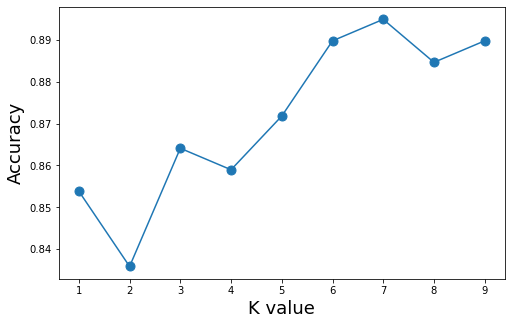

In [511]:
knn_acc = []

for i in range(1,10):
    knn = KNeighborsClassifier(n_neighbors=i)
    acc = cross_val_score(knn, sampled_X, sampled_Y, cv=5)
    knn_acc.append(acc.mean())

plt.figure(figsize=(8,5))
plt.plot(range(1,10),knn_acc, marker='o', markersize=9)
plt.xlabel("K value", fontsize=18)
plt.ylabel("Accuracy",fontsize=18)

- k=7 is optimal

#### Check the feature scaling method to KNN

#### for k=7

In [512]:
knn = KNeighborsClassifier(n_neighbors=7)

In [513]:
acc = cross_val_score(knn, sampled_X, sampled_Y, cv=5)
print("Accuracy KNN without transformation: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN without transformation: 0.89 (+/- 0.05)


In [514]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()),
                   ('model',knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN with Standardization: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Standardization: 0.91 (+/- 0.05)


In [516]:
# create pipeline - > Normalizaton
pipeline = Pipeline(steps=[('scaler', preprocessing.MinMaxScaler()),
                   ('model', knn)])

# perform cross validation
acc = cross_val_score(estimator=pipeline, 
                         X=sampled_X, 
                         y=sampled_Y, 
                         cv=5
                        )

print("Accuracy KNN with Normalizaton: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN with Normalizaton: 0.90 (+/- 0.05)


- Standerdization performed well

#### Evaluation without Feaure scaling

In [517]:
# create pipeline -> Standardization
pipeline = Pipeline(steps=[('scaler', StandardScaler()), ('model',knn)])

In [525]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_20, y=sampled_Y, cv=5)
print("Accuracy KNN using best 20 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 20 features: 0.87 (+/- 0.08)


In [519]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_50, y=sampled_Y, cv=5)
print("Accuracy KNN using best 50 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 50 features: 0.89 (+/- 0.06)


In [520]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_100, y=sampled_Y, cv=5)
print("Accuracy KNN using best 100 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy RF using best 100 features: 0.91 (+/- 0.07)


#### Select features amount larger than 100

In [526]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_150, y=sampled_Y, cv=5)
print("Accuracy KNN using best 150 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 150 features: 0.91 (+/- 0.03)


In [527]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_200, y=sampled_Y, cv=5)
print("Accuracy KNN using best 200 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 200 features: 0.91 (+/- 0.07)


In [528]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_250, y=sampled_Y, cv=5)
print("Accuracy KNN using best 250 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 250 features: 0.91 (+/- 0.06)


In [529]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_270, y=sampled_Y, cv=5)
print("Accuracy KNN using best 270 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 270 features: 0.89 (+/- 0.05)


In [530]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_280, y=sampled_Y, cv=5)
print("Accuracy KNN using best 280 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 280 features: 0.89 (+/- 0.06)


In [531]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_290, y=sampled_Y, cv=5)
print("Accuracy KNN using best 290 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 290 features: 0.90 (+/- 0.05)


In [532]:
# perform cross validation
acc = cross_val_score(estimator=pipeline, X=sampled_X_230, y=sampled_Y, cv=5)
print("Accuracy KNN using best 230 features: %0.2f (+/- %0.2f)" % (acc.mean(), acc.std() * 2))

Accuracy KNN using best 230 features: 0.91 (+/- 0.06)


In [ ]:
import csv
with open('selected_125_features.csv', 'w', encoding='UTF8',newline='') as f:
    writer = csv.writer(f)
    
    for i in range(sampled_X_125.shape[1]):
        # write the data
        writer.writerow([sampled_X_125.columns[i]])